In [1]:
import pandas as pd
import numpy as np

## Predicting sat/unsat without undersampling

In [2]:
runtimes = pd.read_excel('C:/Users/Jasmin/Documents/MSc-Thesis/Data/Runtime/Results-MIPVerify_SDPdMLPa.xlsx')

In [3]:
df0 = pd.read_csv('C:/Users/Jasmin/Documents/MSc-Thesis/Feature_Extraction/feature_data_rp/RP_dynamic_dataclean_11.csv')
df0.rename(columns={'SampleNumber': 'INSTANCE_NAME'}, inplace=True)
df0.drop(columns='Unnamed: 0', inplace=True)
df = pd.merge(pd.read_csv('C:/Users/Jasmin/Documents/MSc-Thesis/Feature_Extraction/feature_data_rp/RP_data_08.csv'),
              pd.read_csv('C:/Users/Jasmin/Documents/MSc-Thesis/Feature_Extraction/feature_data_rp/RP_data_09.csv'), on="INSTANCE_NAME")

df['INSTANCE_NAME'] = df['INSTANCE_NAME'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
df0['INSTANCE_NAME'] = df0['INSTANCE_NAME'].astype('int')

df = pd.merge(df,df0, on="INSTANCE_NAME")

lp_list = list(df['INSTANCE_NAME'])
runtimes = runtimes.loc[runtimes['SampleNumber'].isin(lp_list)]
df = df.rename(columns={"INSTANCE_NAME": "SampleNumber"})
## Join the two datasets by samplenumber/lp_file
df = pd.merge(df, runtimes, on="SampleNumber")
nunique = df.nunique()
cols_to_drop = nunique[nunique == 1].index
df = df.drop(cols_to_drop, axis=1)
df = df.T.drop_duplicates().T
df

,SampleNumber,VARS_presolve_default,BIN_VARS_presolve_default,CONT_VARS_presolve_default,UPPERBOUNDS_MEAN_presolve_default,UPPERBOUNDS_MIN_presolve_default,UPPERBOUNDS_MAX_presolve_default,UPPERBOUNDS_STD_presolve_default,UPPERBOUNDS_MEDIAN_presolve_default,UPPERBOUNDS_DENSITY_presolve_default,...,SolveTime_default,SolveStatus_default,SolveTime_conf1,SolveStatus_conf1,SolveTime_conf2,SolveStatus_conf2,SolveTime_conf3,SolveStatus_conf3,SolveTime_best,Config_best
0,1,1437.0,330.0,1107.0,0.452455,0.0,4.014668,0.208556,0.1,0.999304,...,104.393417,InfeasibleOrUnbounded,152.683291,InfeasibleOrUnbounded,44.068493,Infeasible,78.731996,Infeasible,44.068493,SolveTime_conf2
1,10,1403.0,313.0,1090.0,0.459198,0.0,4.514678,0.241107,0.1,0.996436,...,9600.019248,UserLimit,9600.330209,UserLimit,9600.206703,UserLimit,9600.171495,UserLimit,9600.019248,TIMEOUT
2,100,1399.0,311.0,1088.0,0.432643,0.0,4.140987,0.204747,0.1,0.99857,...,89.865928,InfeasibleOrUnbounded,779.582903,InfeasibleOrUnbounded,80.580781,Infeasible,215.399513,Infeasible,80.580781,SolveTime_conf2
3,1000,1443.0,333.0,1110.0,0.466921,0.0,4.464831,0.221774,0.1,0.999307,...,9600.048013,UserLimit,9600.379411,UserLimit,9600.130473,UserLimit,9600.117678,UserLimit,9600.048013,TIMEOUT
4,10000,1329.0,276.0,1053.0,0.423002,0.003922,3.856785,0.220129,0.1,1.0,...,22.112561,InfeasibleOrUnbounded,378.362607,InfeasibleOrUnbounded,78.919991,Infeasible,18.838446,Infeasible,18.838446,SolveTime_conf3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,1375.0,299.0,1076.0,0.441397,0.0,3.593675,0.207536,0.1,0.999273,...,136.404467,InfeasibleOrUnbounded,169.627541,InfeasibleOrUnbounded,179.118139,Infeasible,200.96392,Infeasible,136.404467,SolveTime_default
9996,9996,1275.0,249.0,1026.0,0.380774,0.0,3.215775,0.189279,0.1,0.904314,...,12.67472,InfeasibleOrUnbounded,18608.097787,UserLimit,25.863838,Infeasible,172.11687,Infeasible,12.67472,SolveTime_default
9997,9997,1379.0,301.0,1078.0,0.418347,0.000135,3.886279,0.207325,0.1,1.0,...,18.37995,InfeasibleOrUnbounded,110.131027,InfeasibleOrUnbounded,50.209194,Infeasible,110.876559,Infeasible,18.37995,SolveTime_default
9998,9998,1365.0,294.0,1071.0,0.430596,0.0,4.26094,0.212202,0.1,0.999267,...,75.684641,InfeasibleOrUnbounded,105.670172,InfeasibleOrUnbounded,106.346014,Infeasible,102.81169,Infeasible,75.684641,SolveTime_default


In [4]:
df[df['SolveStatus_conf3'] == 'Optimal'] 
# Count userlimit config default == 2658
# Count InfeasibleOrUnbounded config default == 6505
# Count Infeasible config default == 0
# Count Optimal config default == 837

# Count userlimit config1 == 2086
# Count InfeasibleOrUnbounded config default == 7209
# Count Infeasible config default == 0
# Count Optimal config1 == 705

# Count userlimit config2 == 1848
# Count InfeasibleOrUnbounded config2 == 0
# Count Infeasible config2 == 7512
# Count Optimal config2 == 640

# Count userlimit config3 == 1650
# Count InfeasibleOrUnbounded config3 == 0
# Count Infeasible config3 == 7502
# Count Optimal config3 == 848

,SampleNumber,VARS_presolve_default,BIN_VARS_presolve_default,CONT_VARS_presolve_default,UPPERBOUNDS_MEAN_presolve_default,UPPERBOUNDS_MIN_presolve_default,UPPERBOUNDS_MAX_presolve_default,UPPERBOUNDS_STD_presolve_default,UPPERBOUNDS_MEDIAN_presolve_default,UPPERBOUNDS_DENSITY_presolve_default,...,SolveTime_default,SolveStatus_default,SolveTime_conf1,SolveStatus_conf1,SolveTime_conf2,SolveStatus_conf2,SolveTime_conf3,SolveStatus_conf3,SolveTime_best,Config_best
18,1013,1423.0,323.0,1100.0,0.456437,0.0,4.009488,0.218846,0.1,0.999297,...,17.055727,Optimal,54.060915,Optimal,5.729277,Optimal,5.120958,Optimal,5.120958,SolveTime_conf3
20,1015,1501.0,362.0,1139.0,0.499228,0.0,4.991989,0.241948,0.1,0.999334,...,9.31577,Optimal,555.680575,Optimal,1.635875,Optimal,1.373719,Optimal,1.373719,SolveTime_conf3
40,1033,1365.0,294.0,1071.0,0.428689,0.0,4.091098,0.208719,0.1,0.999267,...,809.615652,Optimal,1510.567759,Optimal,2281.130133,Optimal,2575.033846,Optimal,809.615652,SolveTime_default
48,1040,1535.0,379.0,1156.0,0.490521,0.0,4.70845,0.226743,0.1,0.999349,...,12.581302,Optimal,39.910459,Optimal,2.963353,Optimal,2.486743,Optimal,2.486743,SolveTime_conf3
60,1051,1541.0,382.0,1159.0,0.495927,0.0,4.742015,0.232106,0.1,0.999351,...,10.91821,Optimal,829.304197,Optimal,3.181931,Optimal,3.415408,Optimal,3.181931,SolveTime_conf2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9939,9944,1413.0,318.0,1095.0,0.464512,0.0,4.732901,0.252213,0.1,0.997877,...,5853.899397,Optimal,9600.032093,UserLimit,9600.101891,UserLimit,3355.84322,Optimal,3355.84322,SolveTime_conf3
9940,9945,1383.0,303.0,1080.0,0.452675,0.0,4.856566,0.24234,0.1,0.997831,...,3.69777,Optimal,33.082093,Optimal,1.138001,Optimal,0.925751,Optimal,0.925751,SolveTime_conf3
9969,9971,1423.0,323.0,1100.0,0.45286,0.0,4.403672,0.225687,0.1,0.999297,...,2.224831,Optimal,26.088385,Optimal,1.529443,Optimal,1.018848,Optimal,1.018848,SolveTime_conf3
9974,9976,1419.0,321.0,1098.0,0.473552,0.003922,4.762601,0.244331,0.1,1.0,...,2.24775,Optimal,623.025374,Optimal,1.507535,Optimal,0.954469,Optimal,0.954469,SolveTime_conf3


InfeasibleOrUnbounded    3252
UserLimit                1329
Optimal                   419
Name: SolveStatus_default, dtype: int64
InfeasibleOrUnbounded    3253
UserLimit                1329
Optimal                   418
Name: SolveStatus_default, dtype: int64
training accuracy: 1.0
test accuracy: 0.8516
[[3082  171    0]
 [ 388  897   44]
 [  24  115  279]]


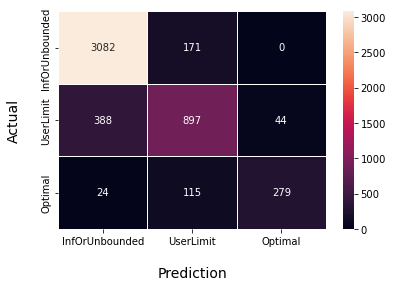

,0
LH_CONSTR_MAX_presolve_default,0.038389
CONSTR_MAX_presolve_default,0.036581
LOWERBOUNDS_STD_presolve_default,0.034322
BOUNDRANGE_MAX_presolve_default,0.031207
LOWERBOUNDS_MIN_presolve_default,0.024489
Presolvers_milp_ChgBounds,0.019123
LP_dualLP_Iter/call,0.018125
LP_strongbranching_2_Iterations,0.017639
LP_strongbranching_2_Calls,0.017192
BranchingRules_relpscost_ExecTime,0.015474


In [4]:
#### SOLVER STATUS DEFAULT
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix



X = df.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best'], axis = 1)
y = df['SolveStatus_default']
training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .5, random_state = 42, stratify=y)
print(training_labels.value_counts())
print(testing_labels.value_counts())

clf=RandomForestClassifier()
clf.fit(training, training_labels)
preds = clf.predict(testing)

print("training accuracy:", clf.score(training, training_labels))
print("test accuracy:", clf.score(testing, testing_labels))
#print("f1 score:", f1_score(y_true=testing_labels, y_pred=preds))


c_array = confusion_matrix(testing_labels, preds, labels=['InfeasibleOrUnbounded', 'UserLimit', 'Optimal'])
print(c_array)


ax = plt.axes()
ax = sns.heatmap(c_array, linewidth=0.5, annot=True, fmt='d')
#ax.set_title("Classification of Config default solver status using SCIP feature extractor")
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.set_xlabel("Prediction", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['InfOrUnbounded', 'UserLimit', 'Optimal'])
ax.yaxis.set_ticklabels(['InfOrUnbounded', 'UserLimit', 'Optimal'])
plt.show()

pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False).head(10)

InfeasibleOrUnbounded    6505
Optimal                   837
Name: SolveStatus_default, dtype: int64
InfeasibleOrUnbounded    3252
Optimal                   419
Name: SolveStatus_default, dtype: int64
InfeasibleOrUnbounded    3253
Optimal                   418
Name: SolveStatus_default, dtype: int64
training accuracy: 1.0
test accuracy: 0.9847453010078998
f1 score: 0.9287531806615776
[[3250    3]
 [  53  365]]


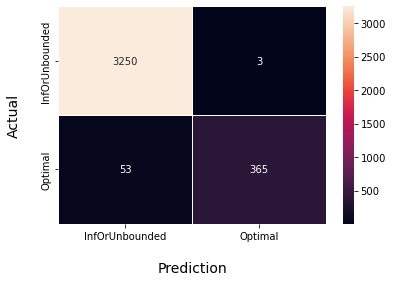

,0
GapFirstSol.,0.066504
LP_strongbranching_2_ItLimit,0.064855
FirstSolution,0.056683
GapLastSol.,0.053300
Solutionsfound,0.043190
Constraints_benders_1_#Check,0.034937
ConstraintTimings_integral_1_EnfoLP,0.034220
PrimalBound,0.033131
LH_CONSTR_MAX_presolve_default,0.031657
LP_strongbranching_2_Calls,0.026627


In [6]:
## Without UserLimit
#### SOLVER STATUS DEFAULT
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, f1_score


df_no_ul = df[df.SolveStatus_default != 'UserLimit']
#print(len(df_no_ul.SolveStatus_default))
print(df_no_ul['SolveStatus_default'].value_counts())


X = df_no_ul.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best'], axis = 1)
y = df_no_ul['SolveStatus_default']
training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .5, random_state = 42, stratify=y)
print(training_labels.value_counts())
print(testing_labels.value_counts())

clf=RandomForestClassifier()
clf.fit(training, training_labels)
preds = clf.predict(testing)

print("training accuracy:", clf.score(training, training_labels))
print("test accuracy:", clf.score(testing, testing_labels))
print("f1 score:", f1_score(y_true=testing_labels, y_pred=preds, pos_label='Optimal'))


c_array = confusion_matrix(testing_labels, preds, labels=['InfeasibleOrUnbounded', 'Optimal'])
print(c_array)


ax = plt.axes()
ax = sns.heatmap(c_array, linewidth=0.5, annot=True, fmt='d')
#ax.set_title("Binary Classification of Config default solver status using SCIP feature extractor")
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.set_xlabel("Prediction", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['InfOrUnbounded', 'Optimal'])
ax.yaxis.set_ticklabels(['InfOrUnbounded', 'Optimal'])
plt.show()

pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False).head(10)

In [7]:
# checking the misclassified instances
df_no_ul[df_no_ul.index.isin(testing_labels.index)]

,SampleNumber,VARS_presolve_default,BIN_VARS_presolve_default,CONT_VARS_presolve_default,UPPERBOUNDS_MEAN_presolve_default,UPPERBOUNDS_MIN_presolve_default,UPPERBOUNDS_MAX_presolve_default,UPPERBOUNDS_STD_presolve_default,UPPERBOUNDS_MEDIAN_presolve_default,UPPERBOUNDS_DENSITY_presolve_default,...,SolveTime_default,SolveStatus_default,SolveTime_conf1,SolveStatus_conf1,SolveTime_conf2,SolveStatus_conf2,SolveTime_conf3,SolveStatus_conf3,SolveTime_best,Config_best
0,1,1437.0,330.0,1107.0,0.452455,0.0,4.014668,0.208556,0.1,0.999304,...,104.393417,InfeasibleOrUnbounded,152.683291,InfeasibleOrUnbounded,44.068493,Infeasible,78.731996,Infeasible,44.068493,SolveTime_conf2
2,100,1399.0,311.0,1088.0,0.432643,0.0,4.140987,0.204747,0.1,0.99857,...,89.865928,InfeasibleOrUnbounded,779.582903,InfeasibleOrUnbounded,80.580781,Infeasible,215.399513,Infeasible,80.580781,SolveTime_conf2
4,10000,1329.0,276.0,1053.0,0.423002,0.003922,3.856785,0.220129,0.1,1.0,...,22.112561,InfeasibleOrUnbounded,378.362607,InfeasibleOrUnbounded,78.919991,Infeasible,18.838446,Infeasible,18.838446,SolveTime_conf3
6,1002,1347.0,285.0,1062.0,0.43505,0.0,3.96211,0.222131,0.1,0.999258,...,97.101702,InfeasibleOrUnbounded,589.42101,InfeasibleOrUnbounded,52.083775,Infeasible,54.560538,Infeasible,52.083775,SolveTime_conf2
7,1003,1341.0,282.0,1059.0,0.431604,0.0,3.936426,0.224206,0.1,0.997017,...,963.175574,InfeasibleOrUnbounded,125.566326,InfeasibleOrUnbounded,75.395103,Infeasible,101.884567,Infeasible,75.395103,SolveTime_conf2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,998,1347.0,285.0,1062.0,0.422358,0.0,3.723005,0.213261,0.1,0.997773,...,93.148071,InfeasibleOrUnbounded,989.179514,InfeasibleOrUnbounded,27.565806,Infeasible,2870.818679,Infeasible,27.565806,SolveTime_conf2
9983,9984,1329.0,276.0,1053.0,0.424237,0.0,3.856551,0.222358,0.1,0.997743,...,19.486989,InfeasibleOrUnbounded,819.904871,InfeasibleOrUnbounded,28.711785,Infeasible,23.262188,Infeasible,19.486989,SolveTime_default
9988,9989,1397.0,310.0,1087.0,0.453524,0.0,4.482355,0.238359,0.1,0.999284,...,18.565732,InfeasibleOrUnbounded,77.400619,InfeasibleOrUnbounded,339.408313,Infeasible,258.366056,Infeasible,18.565732,SolveTime_default
9991,9991,1407.0,315.0,1092.0,0.432735,0.0,3.847531,0.204447,0.1,0.998579,...,18.198722,InfeasibleOrUnbounded,899.18357,InfeasibleOrUnbounded,83.397538,Infeasible,39.740982,Infeasible,18.198722,SolveTime_default


In [8]:
predlist = []
labellist = []
indexlist = []
testing_index_list = testing_labels.index
new_testing_labels = testing_labels.reset_index(drop=True)

for i in range(len(preds)):
    if preds[i] == new_testing_labels[i]:
        pass
    else:
        predlist.append(preds[i])
        labellist.append(new_testing_labels[i])
        indexlist.append(testing_index_list[i])



In [9]:
temp1 = df_no_ul[['SampleNumber', 'SolveTime_default', 'SolveStatus_default', 'Config_best']]

In [10]:
temp2 = pd.DataFrame({'pred':predlist, 'label': labellist}, index=indexlist)

In [11]:
pd.merge(temp1, temp2, left_index=True, right_index=True).head(60)

,SampleNumber,SolveTime_default,SolveStatus_default,Config_best,pred,label
136,112,13.198998,Optimal,SolveTime_conf2,InfeasibleOrUnbounded,Optimal
255,1227,10.176386,Optimal,SolveTime_conf3,InfeasibleOrUnbounded,Optimal
293,1261,15.333422,Optimal,SolveTime_conf3,InfeasibleOrUnbounded,Optimal
587,1526,6.421049,Optimal,SolveTime_conf3,InfeasibleOrUnbounded,Optimal
614,1550,6.337642,Optimal,SolveTime_conf3,InfeasibleOrUnbounded,Optimal
637,1571,9565.516571,Optimal,SolveTime_conf3,InfeasibleOrUnbounded,Optimal
800,1718,9.019273,Optimal,SolveTime_conf3,InfeasibleOrUnbounded,Optimal
827,1742,10.722611,Optimal,SolveTime_conf3,InfeasibleOrUnbounded,Optimal
978,1879,12.05222,Optimal,SolveTime_conf3,InfeasibleOrUnbounded,Optimal
981,1881,523.487651,Optimal,SolveTime_default,InfeasibleOrUnbounded,Optimal


InfeasibleOrUnbounded    3605
UserLimit                1043
Optimal                   352
Name: SolveStatus_conf1, dtype: int64
InfeasibleOrUnbounded    3604
UserLimit                1043
Optimal                   353
Name: SolveStatus_conf1, dtype: int64
training accuracy: 1.0
test accuracy: 0.867
[[3504  100    0]
 [ 400  625   18]
 [  30  117  206]]


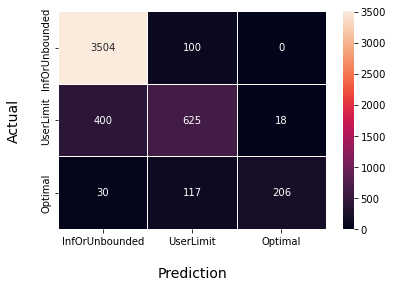

,0
CONSTR_MAX_presolve_default,0.035219
LH_CONSTR_MAX_presolve_default,0.027134
PrimalBound,0.026506
BOUNDRANGE_MAX_presolve_default,0.026421
LOWERBOUNDS_STD_presolve_default,0.025566
LOWERBOUNDS_MIN_presolve_default,0.021165
LP_strongbranching_2_Iterations,0.020913
LP_strongbranching_2_ItLimit,0.017405
LP_strongbranching_2_Time,0.016065
GapFirstSol.,0.015652


In [12]:
#### SOLVER STATUS conf1
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix



X = df.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best'], axis = 1)
y = df['SolveStatus_conf1']
training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .5, random_state = 42, stratify=y)
print(training_labels.value_counts())
print(testing_labels.value_counts())

clf=RandomForestClassifier()
clf.fit(training, training_labels)
preds = clf.predict(testing)

print("training accuracy:", clf.score(training, training_labels))
print("test accuracy:", clf.score(testing, testing_labels))
#print("f1 score:", f1_score(y_true=testing_labels, y_pred=preds))


c_array = confusion_matrix(testing_labels, preds, labels=['InfeasibleOrUnbounded', 'UserLimit', 'Optimal'])
print(c_array)


ax = plt.axes()
ax = sns.heatmap(c_array, linewidth=0.5, annot=True, fmt='d')
#ax.set_title("Classification of Config default solver status using SCIP feature extractor")
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.set_xlabel("Prediction", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['InfOrUnbounded', 'UserLimit', 'Optimal'])
ax.yaxis.set_ticklabels(['InfOrUnbounded', 'UserLimit', 'Optimal'])
plt.show()

pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False).head(10)

InfeasibleOrUnbounded    7209
Optimal                   705
Name: SolveStatus_conf1, dtype: int64
InfeasibleOrUnbounded    3604
Optimal                   353
Name: SolveStatus_conf1, dtype: int64
InfeasibleOrUnbounded    3605
Optimal                   352
Name: SolveStatus_conf1, dtype: int64
training accuracy: 1.0
test accuracy: 0.9825625473843821
f1 score: 0.892018779342723
[[3603    2]
 [  67  285]]


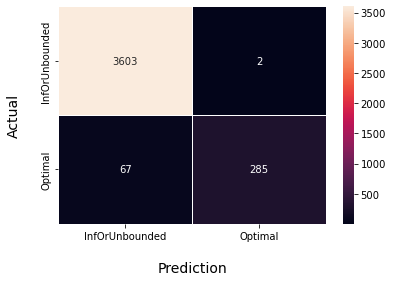

,0
BranchingRules_relpscost_ExecTime,0.055753
GapFirstSol.,0.051125
PrimalBound,0.046794
LP_strongbranching_2_Time,0.041661
GapLastSol.,0.039559
Solutionsfound,0.036477
ConstraintTimings_integral_1_EnfoLP,0.036447
LP_strongbranching_2_Iterations,0.027249
ConstraintTimings_integral_1_TotalTime,0.026814
FirstSolution,0.026671


In [13]:
## Without UserLimit
#### SOLVER STATUS conf1
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, f1_score


df_no_ul = df[df.SolveStatus_conf1 != 'UserLimit']
#print(len(df_no_ul.SolveStatus_default))
print(df_no_ul['SolveStatus_conf1'].value_counts())


X = df_no_ul.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best'], axis = 1)
y = df_no_ul['SolveStatus_conf1']
training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .5, random_state = 42, stratify=y)
print(training_labels.value_counts())
print(testing_labels.value_counts())

clf=RandomForestClassifier()
clf.fit(training, training_labels)
preds = clf.predict(testing)

print("training accuracy:", clf.score(training, training_labels))
print("test accuracy:", clf.score(testing, testing_labels))
print("f1 score:", f1_score(y_true=testing_labels, y_pred=preds, pos_label='Optimal'))


c_array = confusion_matrix(testing_labels, preds, labels=['InfeasibleOrUnbounded', 'Optimal'])
print(c_array)


ax = plt.axes()
ax = sns.heatmap(c_array, linewidth=0.5, annot=True, fmt='d')
#ax.set_title("Binary Classification of Config default solver status using SCIP feature extractor")
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.set_xlabel("Prediction", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['InfOrUnbounded', 'Optimal'])
ax.yaxis.set_ticklabels(['InfOrUnbounded', 'Optimal'])
plt.show()

pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False).head(10)

Infeasible    3756
UserLimit      924
Optimal        320
Name: SolveStatus_conf2, dtype: int64
Infeasible    3756
UserLimit      924
Optimal        320
Name: SolveStatus_conf2, dtype: int64
training accuracy: 1.0
test accuracy: 0.8768
[[3661   94    1]
 [ 350  552   22]
 [  28  121  171]]


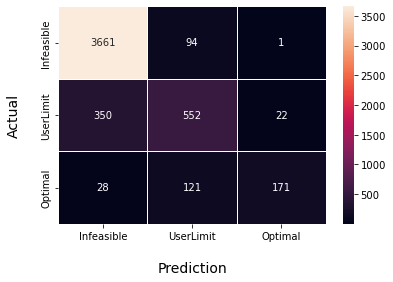

,0
LP_strongbranching_2_Iterations,0.036682
CONSTR_MAX_presolve_default,0.032565
LH_CONSTR_MAX_presolve_default,0.026061
LP_strongbranching_2_Time,0.023699
LOWERBOUNDS_MIN_presolve_default,0.023199
BOUNDRANGE_MAX_presolve_default,0.021688
ConstraintTimings_integral_1_EnfoLP,0.019656
LOWERBOUNDS_STD_presolve_default,0.019653
FirstSolution,0.019455
LP_strongbranching_2_Calls,0.019329


In [14]:
#### SOLVER STATUS conf2
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix



X = df.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best'], axis = 1)
y = df['SolveStatus_conf2']
training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .5, random_state = 42, stratify=y)
print(training_labels.value_counts())
print(testing_labels.value_counts())

clf=RandomForestClassifier()
clf.fit(training, training_labels)
preds = clf.predict(testing)

print("training accuracy:", clf.score(training, training_labels))
print("test accuracy:", clf.score(testing, testing_labels))
#print("f1 score:", f1_score(y_true=testing_labels, y_pred=preds))


c_array = confusion_matrix(testing_labels, preds, labels=['Infeasible', 'UserLimit', 'Optimal'])
print(c_array)


ax = plt.axes()
ax = sns.heatmap(c_array, linewidth=0.5, annot=True, fmt='d')
#ax.set_title("Classification of Config default solver status using SCIP feature extractor")
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.set_xlabel("Prediction", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Infeasible', 'UserLimit', 'Optimal'])
ax.yaxis.set_ticklabels(['Infeasible', 'UserLimit', 'Optimal'])
plt.show()

pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False).head(10)

Infeasible    7512
Optimal        640
Name: SolveStatus_conf2, dtype: int64
Infeasible    3756
Optimal        320
Name: SolveStatus_conf2, dtype: int64
Infeasible    3756
Optimal        320
Name: SolveStatus_conf2, dtype: int64
training accuracy: 1.0
test accuracy: 0.9835623159960746
f1 score: 0.8834782608695653
[[3755    1]
 [  66  254]]


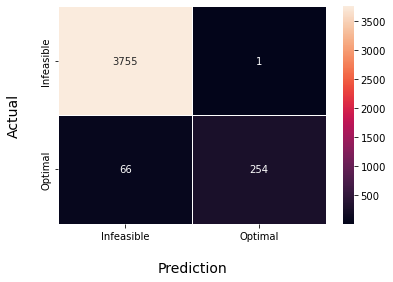

,0
GapLastSol.,0.057772
LP_strongbranching_2_Iter/call,0.056590
ConstraintTimings_integral_1_EnfoLP,0.050304
Solutionsfound,0.048934
ConstraintTimings_integral_1_TotalTime,0.047515
BranchingRules_relpscost_BranchLP,0.046276
BranchingRules_relpscost_ExecTime,0.045288
PrimalBound,0.043051
FirstSolution,0.038028
GapFirstSol.,0.034466


In [15]:
## Without UserLimit
#### SOLVER STATUS conf2
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, f1_score


df_no_ul = df[df.SolveStatus_conf2 != 'UserLimit']
#print(len(df_no_ul.SolveStatus_default))
print(df_no_ul['SolveStatus_conf2'].value_counts())


X = df_no_ul.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best'], axis = 1)
y = df_no_ul['SolveStatus_conf2']
training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .5, random_state = 42, stratify=y)
print(training_labels.value_counts())
print(testing_labels.value_counts())

clf=RandomForestClassifier()
clf.fit(training, training_labels)
preds = clf.predict(testing)

print("training accuracy:", clf.score(training, training_labels))
print("test accuracy:", clf.score(testing, testing_labels))
print("f1 score:", f1_score(y_true=testing_labels, y_pred=preds, pos_label='Optimal'))


c_array = confusion_matrix(testing_labels, preds, labels=['Infeasible', 'Optimal'])
print(c_array)


ax = plt.axes()
ax = sns.heatmap(c_array, linewidth=0.5, annot=True, fmt='d')
#ax.set_title("Binary Classification of Config default solver status using SCIP feature extractor")
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.set_xlabel("Prediction", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Infeasible', 'Optimal'])
ax.yaxis.set_ticklabels(['Infeasible', 'Optimal'])
plt.show()

pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False).head(10)

Infeasible    3751
UserLimit      825
Optimal        424
Name: SolveStatus_conf3, dtype: int64
Infeasible    3751
UserLimit      825
Optimal        424
Name: SolveStatus_conf3, dtype: int64
training accuracy: 1.0
test accuracy: 0.875
[[3670   81    0]
 [ 354  423   48]
 [  52   90  282]]


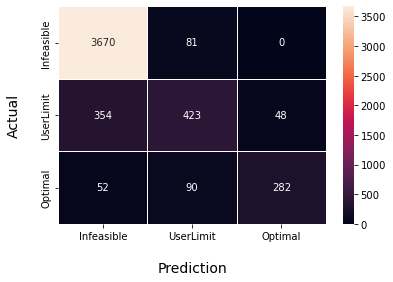

,0
LH_CONSTR_MAX_presolve_default,0.030168
CONSTR_MAX_presolve_default,0.028410
ConstraintTimings_integral_1_TotalTime,0.022523
BOUNDRANGE_MAX_presolve_default,0.022511
LOWERBOUNDS_MIN_presolve_default,0.022224
LOWERBOUNDS_STD_presolve_default,0.021970
GapLastSol.,0.021004
PrimalBound,0.020655
ConstraintTimings_integral_1_EnfoLP,0.019690
BranchingRules_relpscost_ExecTime,0.016765


In [16]:
#### SOLVER STATUS conf3
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix



X = df.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best'], axis = 1)
y = df['SolveStatus_conf3']
training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .5, random_state = 42, stratify=y)
print(training_labels.value_counts())
print(testing_labels.value_counts())

clf=RandomForestClassifier()
clf.fit(training, training_labels)
preds = clf.predict(testing)

print("training accuracy:", clf.score(training, training_labels))
print("test accuracy:", clf.score(testing, testing_labels))
#print("f1 score:", f1_score(y_true=testing_labels, y_pred=preds))


c_array = confusion_matrix(testing_labels, preds, labels=['Infeasible', 'UserLimit', 'Optimal'])
print(c_array)


ax = plt.axes()
ax = sns.heatmap(c_array, linewidth=0.5, annot=True, fmt='d')
#ax.set_title("Classification of Config default solver status using SCIP feature extractor")
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.set_xlabel("Prediction", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Infeasible', 'UserLimit', 'Optimal'])
ax.yaxis.set_ticklabels(['Infeasible', 'UserLimit', 'Optimal'])
plt.show()

pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False).head(10)

Infeasible    7502
Optimal        848
Name: SolveStatus_conf3, dtype: int64
Infeasible    3751
Optimal        424
Name: SolveStatus_conf3, dtype: int64
Infeasible    3751
Optimal        424
Name: SolveStatus_conf3, dtype: int64
training accuracy: 1.0
test accuracy: 0.978682634730539
f1 score: 0.8836601307189541
[[3748    3]
 [  86  338]]


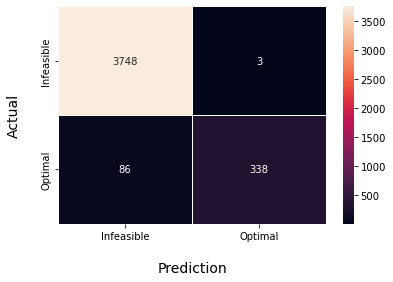

,0
GapFirstSol.,0.082318
BranchingRules_relpscost_ExecTime,0.056601
LP_strongbranching_2_ItLimit,0.047858
PrimalBound,0.044612
GapLastSol.,0.041593
LP_strongbranching_2_Time,0.040337
Solutionsfound,0.033461
LP_strongbranching_2_Iterations,0.031929
Constraints_setppc_1_#Check,0.026072
Constraints_benders_1_#Check,0.024937


In [17]:
## Without UserLimit
#### SOLVER STATUS conf3
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, f1_score


df_no_ul = df[df.SolveStatus_conf3 != 'UserLimit']
#print(len(df_no_ul.SolveStatus_default))
print(df_no_ul['SolveStatus_conf3'].value_counts())


X = df_no_ul.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best'], axis = 1)
y = df_no_ul['SolveStatus_conf3']
training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .5, random_state = 42, stratify=y)
print(training_labels.value_counts())
print(testing_labels.value_counts())

clf=RandomForestClassifier()
clf.fit(training, training_labels)
preds = clf.predict(testing)

print("training accuracy:", clf.score(training, training_labels))
print("test accuracy:", clf.score(testing, testing_labels))
print("f1 score:", f1_score(y_true=testing_labels, y_pred=preds, pos_label='Optimal'))


c_array = confusion_matrix(testing_labels, preds, labels=['Infeasible', 'Optimal'])
print(c_array)


ax = plt.axes()
ax = sns.heatmap(c_array, linewidth=0.5, annot=True, fmt='d')
#ax.set_title("Binary Classification of Config default solver status using SCIP feature extractor")
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.set_xlabel("Prediction", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Infeasible', 'Optimal'])
ax.yaxis.set_ticklabels(['Infeasible', 'Optimal'])
plt.show()

pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False).head(10)

## Predicting timeout for multiple userlimits

In [18]:
def set_timeout(x, t):
    if x >= t:
        return 9600
    else:
        return x


In [19]:
def timeout_dummy(x):
    if x >=9600:
        return 1
    else:
        return 0

df['SolveTime_best'].apply(set_timeout, t=9600).apply(timeout_dummy)

0       0
1       1
2       0
3       1
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: SolveTime_best, Length: 10000, dtype: int64

In [20]:
df0 = pd.read_csv('C:/Users/Jasmin/Documents/MSc-Thesis/Feature_Extraction/feature_data_rp/RP_dynamic_dataclean_11.csv')
df0.rename(columns={'SampleNumber': 'INSTANCE_NAME'}, inplace=True)
df0.drop(columns='Unnamed: 0', inplace=True)
df = pd.merge(pd.read_csv('C:/Users/Jasmin/Documents/MSc-Thesis/Feature_Extraction/feature_data_rp/RP_data_08.csv'),
              pd.read_csv('C:/Users/Jasmin/Documents/MSc-Thesis/Feature_Extraction/feature_data_rp/RP_data_09.csv'), on="INSTANCE_NAME")

df['INSTANCE_NAME'] = df['INSTANCE_NAME'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
df0['INSTANCE_NAME'] = df0['INSTANCE_NAME'].astype('int')

df = pd.merge(df,df0, on="INSTANCE_NAME")

lp_list = list(df['INSTANCE_NAME'])
runtimes = runtimes.loc[runtimes['SampleNumber'].isin(lp_list)]
df = df.rename(columns={"INSTANCE_NAME": "SampleNumber"})
## Join the two datasets by samplenumber/lp_file
df = pd.merge(df, runtimes, on="SampleNumber")
nunique = df.nunique()
cols_to_drop = nunique[nunique == 1].index
df = df.drop(cols_to_drop, axis=1)
df = df.T.drop_duplicates().T

In [21]:
df['SolveTime_best'].apply(set_timeout, t=9600).apply(timeout_dummy)

0       0
1       1
2       0
3       1
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: SolveTime_best, Length: 10000, dtype: int64

In [22]:
t_list = np.arange(20, 9620, 20)

train_accuracy = []
test_accuracy = []
f1score = []
majclass = []

for t in t_list:
    df['TIMEOUT'] = df['SolveTime_default'].apply(set_timeout, t=t).apply(timeout_dummy)
    ## Classifier starts here
    X = df.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best', 'TIMEOUT'], axis = 1)
    y = df['TIMEOUT']
    cl0, cl1 = y.value_counts()
    training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .5, random_state = 42, stratify=y)

    clf=RandomForestClassifier()
    clf.fit(training, training_labels)
    preds = clf.predict(testing)
    print("t:", t)
    #print("training accuracy:", clf.score(training, training_labels))
    #print("test accuracy:", clf.score(testing, testing_labels))
    #print("f1 score:", f1_score(y_true=testing_labels, y_pred=preds))
    #print('------')

    train_accuracy.append(clf.score(training, training_labels))
    test_accuracy.append(clf.score(testing, testing_labels))
    f1score.append(f1_score(y_true=testing_labels, y_pred=preds))
    majclass.append(cl1/10000)


t: 20
t: 40
t: 60
t: 80
t: 100
t: 120
t: 140
t: 160
t: 180
t: 200
t: 220
t: 240
t: 260
t: 280
t: 300
t: 320
t: 340
t: 360
t: 380
t: 400
t: 420
t: 440
t: 460
t: 480
t: 500
t: 520
t: 540
t: 560
t: 580
t: 600
t: 620
t: 640
t: 660
t: 680
t: 700
t: 720
t: 740
t: 760
t: 780
t: 800
t: 820
t: 840
t: 860
t: 880
t: 900
t: 920
t: 940
t: 960
t: 980
t: 1000
t: 1020
t: 1040
t: 1060
t: 1080
t: 1100
t: 1120
t: 1140
t: 1160
t: 1180
t: 1200
t: 1220
t: 1240
t: 1260
t: 1280
t: 1300
t: 1320
t: 1340
t: 1360
t: 1380
t: 1400
t: 1420
t: 1440
t: 1460
t: 1480
t: 1500
t: 1520
t: 1540
t: 1560
t: 1580
t: 1600
t: 1620
t: 1640
t: 1660
t: 1680
t: 1700
t: 1720
t: 1740
t: 1760
t: 1780
t: 1800
t: 1820
t: 1840
t: 1860
t: 1880
t: 1900
t: 1920
t: 1940
t: 1960
t: 1980
t: 2000
t: 2020
t: 2040
t: 2060
t: 2080
t: 2100
t: 2120
t: 2140
t: 2160
t: 2180
t: 2200
t: 2220
t: 2240
t: 2260
t: 2280
t: 2300
t: 2320
t: 2340
t: 2360
t: 2380
t: 2400
t: 2420
t: 2440
t: 2460
t: 2480
t: 2500
t: 2520
t: 2540
t: 2560
t: 2580
t: 2600
t: 2620
t: 26

[0.9091, 0.8431, 0.7472, 0.6542, 0.5964, 0.5484, 0.5162, 0.5025, 0.5091, 0.515, 0.5207999999999999, 0.5246999999999999, 0.5284, 0.5315, 0.5349999999999999, 0.5375, 0.5405, 0.5428, 0.5453, 0.5469999999999999, 0.5485, 0.5512, 0.5533, 0.5552, 0.5570999999999999, 0.5586, 0.5605, 0.5621, 0.5639000000000001, 0.5656, 0.5668, 0.5683, 0.5692999999999999, 0.5710999999999999, 0.5727, 0.5746, 0.5762, 0.577, 0.5775, 0.5783, 0.5800000000000001, 0.5808, 0.5820000000000001, 0.5824, 0.5833999999999999, 0.5847, 0.5858, 0.5867, 0.5875, 0.5884, 0.5893999999999999, 0.5904, 0.5908, 0.5916, 0.593, 0.5937, 0.5944, 0.5953999999999999, 0.5965, 0.5973999999999999, 0.5981000000000001, 0.5987, 0.5991, 0.6002000000000001, 0.6013, 0.6014999999999999, 0.6025, 0.6033, 0.604, 0.6046, 0.6057, 0.6061000000000001, 0.6064, 0.607, 0.6077, 0.6087, 0.6092, 0.61, 0.6106, 0.6115999999999999, 0.6121, 0.6126, 0.6134999999999999, 0.6141, 0.6147, 0.6154999999999999, 0.6161, 0.6164000000000001, 0.6174999999999999, 0.6178, 0.6185, 0.

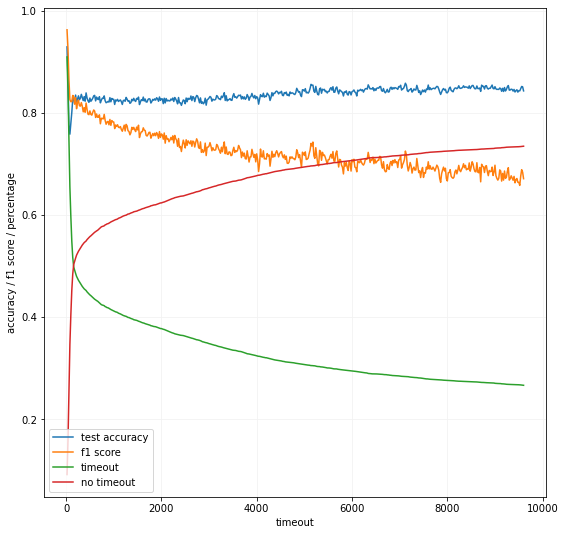

In [25]:
import matplotlib.pyplot as plt
minclass = [1 - x for x in majclass]
print(minclass)
print(majclass)


minclass0 = minclass[:7]
majclass0 = majclass[:7]
test_accuracy0 = test_accuracy[:7]
f1score0 = f1score[:7]
t_list0 = t_list[:7] 


minclass1 = minclass[7:]
majclass1 = majclass[7:]
test_accuracy1 = test_accuracy[7:]
f1score1 = f1score[7:]
t_list1 = t_list[7:] 

plt.figure(figsize=(9, 9))
plt.plot(t_list, test_accuracy, label='test accuracy')
plt.plot(t_list, f1score, label='f1 score')
plt.plot(t_list, minclass0 + majclass1, label='timeout')
plt.plot(t_list, majclass0 + minclass1, label='no timeout')


plt.xlabel("timeout")
plt.ylabel("accuracy / f1 score / percentage")
plt.grid(True, color='0.95')
plt.legend(loc='lower left')
plt.show()


In [27]:
print(f1score)

[0.96225614927905, 0.9251894979677029, 0.8642572222893751, 0.8256801497049086, 0.8213479522734602, 0.8217026592896662, 0.8337164750957855, 0.831993726720251, 0.8165728077232502, 0.829278350515464, 0.8077004442563994, 0.8194126223703394, 0.8247379454926624, 0.8135665529010239, 0.812649945474373, 0.8196000878927707, 0.8127612761276127, 0.8015301530153015, 0.8096635809437797, 0.800718132854578, 0.8187738603188862, 0.8065025965229171, 0.7969683050068902, 0.7960063535284774, 0.803305026394308, 0.7965209430075532, 0.7950397753860552, 0.8006498027384543, 0.8052190121155638, 0.803033894287746, 0.7905325443786982, 0.7972262075561931, 0.7910339840925525, 0.7909875359539789, 0.7956416464891042, 0.7781050564555719, 0.7889423076923078, 0.788475744890421, 0.7876695437731196, 0.7964946445959105, 0.7847053093034582, 0.7772020725388602, 0.781827016520894, 0.7828418230563003, 0.7761417519341154, 0.7865899424568427, 0.7750377453447408, 0.7843726521412471, 0.7819322459222083, 0.7816265060240964, 0.7687280

## Predicting timeout with undersampling

In [24]:
df0 = pd.read_csv('C:/Users/Jasmin/Documents/MSc-Thesis/Feature_Extraction/feature_data_rp/RP_dynamic_dataclean_11.csv')
df0.rename(columns={'SampleNumber': 'INSTANCE_NAME'}, inplace=True)
df0.drop(columns='Unnamed: 0', inplace=True)
df = pd.merge(pd.read_csv('C:/Users/Jasmin/Documents/MSc-Thesis/Feature_Extraction/feature_data_rp/RP_data_08.csv'),
              pd.read_csv('C:/Users/Jasmin/Documents/MSc-Thesis/Feature_Extraction/feature_data_rp/RP_data_09.csv'), on="INSTANCE_NAME")

df['INSTANCE_NAME'] = df['INSTANCE_NAME'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
df0['INSTANCE_NAME'] = df0['INSTANCE_NAME'].astype('int')

df = pd.merge(df,df0, on="INSTANCE_NAME")

lp_list = list(df['INSTANCE_NAME'])
runtimes = runtimes.loc[runtimes['SampleNumber'].isin(lp_list)]
df = df.rename(columns={"INSTANCE_NAME": "SampleNumber"})
## Join the two datasets by samplenumber/lp_file
df = pd.merge(df, runtimes, on="SampleNumber")
nunique = df.nunique()
cols_to_drop = nunique[nunique == 1].index
df = df.drop(cols_to_drop, axis=1)
df = df.T.drop_duplicates().T
df

,SampleNumber,VARS_presolve_default,BIN_VARS_presolve_default,CONT_VARS_presolve_default,UPPERBOUNDS_MEAN_presolve_default,UPPERBOUNDS_MIN_presolve_default,UPPERBOUNDS_MAX_presolve_default,UPPERBOUNDS_STD_presolve_default,UPPERBOUNDS_MEDIAN_presolve_default,UPPERBOUNDS_DENSITY_presolve_default,...,SolveTime_default,SolveStatus_default,SolveTime_conf1,SolveStatus_conf1,SolveTime_conf2,SolveStatus_conf2,SolveTime_conf3,SolveStatus_conf3,SolveTime_best,Config_best
0,1,1437.0,330.0,1107.0,0.452455,0.0,4.014668,0.208556,0.1,0.999304,...,104.393417,InfeasibleOrUnbounded,152.683291,InfeasibleOrUnbounded,44.068493,Infeasible,78.731996,Infeasible,44.068493,SolveTime_conf2
1,10,1403.0,313.0,1090.0,0.459198,0.0,4.514678,0.241107,0.1,0.996436,...,9600.019248,UserLimit,9600.330209,UserLimit,9600.206703,UserLimit,9600.171495,UserLimit,9600.019248,TIMEOUT
2,100,1399.0,311.0,1088.0,0.432643,0.0,4.140987,0.204747,0.1,0.99857,...,89.865928,InfeasibleOrUnbounded,779.582903,InfeasibleOrUnbounded,80.580781,Infeasible,215.399513,Infeasible,80.580781,SolveTime_conf2
3,1000,1443.0,333.0,1110.0,0.466921,0.0,4.464831,0.221774,0.1,0.999307,...,9600.048013,UserLimit,9600.379411,UserLimit,9600.130473,UserLimit,9600.117678,UserLimit,9600.048013,TIMEOUT
4,10000,1329.0,276.0,1053.0,0.423002,0.003922,3.856785,0.220129,0.1,1.0,...,22.112561,InfeasibleOrUnbounded,378.362607,InfeasibleOrUnbounded,78.919991,Infeasible,18.838446,Infeasible,18.838446,SolveTime_conf3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,1375.0,299.0,1076.0,0.441397,0.0,3.593675,0.207536,0.1,0.999273,...,136.404467,InfeasibleOrUnbounded,169.627541,InfeasibleOrUnbounded,179.118139,Infeasible,200.96392,Infeasible,136.404467,SolveTime_default
9996,9996,1275.0,249.0,1026.0,0.380774,0.0,3.215775,0.189279,0.1,0.904314,...,12.67472,InfeasibleOrUnbounded,18608.097787,UserLimit,25.863838,Infeasible,172.11687,Infeasible,12.67472,SolveTime_default
9997,9997,1379.0,301.0,1078.0,0.418347,0.000135,3.886279,0.207325,0.1,1.0,...,18.37995,InfeasibleOrUnbounded,110.131027,InfeasibleOrUnbounded,50.209194,Infeasible,110.876559,Infeasible,18.37995,SolveTime_default
9998,9998,1365.0,294.0,1071.0,0.430596,0.0,4.26094,0.212202,0.1,0.999267,...,75.684641,InfeasibleOrUnbounded,105.670172,InfeasibleOrUnbounded,106.346014,Infeasible,102.81169,Infeasible,75.684641,SolveTime_default


In [25]:
# do all 4 configurations timeout yes or no?
df['TIMEOUT'] = df['SolveTime_best'].apply(set_timeout, t=9600).apply(timeout_dummy)
## Classifier starts here
X = df.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best', 'TIMEOUT'], axis = 1)
y = df['TIMEOUT']

## Try to downsample one of the classes since the dataset is imbalanced
class0, class1 = y.value_counts()
print("0:", class0)
print("1:", class1)

c1 = df[df['TIMEOUT'] == 1]
c0 = df[df['TIMEOUT'] == 0]
df1 = c1.sample(class1)
df0 = c0.sample(class0)

sampled0 = df0.sample(n=len(df1), random_state=1)
undersampled_df = pd.concat([df1, sampled0])
class0, class1 = undersampled_df.TIMEOUT.value_counts()
print("0:", class0)
print("1:", class1)

# do all 4 configurations timeout yes or no?
undersampled_df['TIMEOUT'] = undersampled_df['SolveTime_best'].apply(set_timeout, t=9600).apply(timeout_dummy)
## Classifier starts here
undersampled_X = undersampled_df.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best', 'TIMEOUT'], axis = 1)
undersampled_y = undersampled_df['TIMEOUT']
training, testing, training_labels, testing_labels = train_test_split(undersampled_X, undersampled_y, test_size = .5, random_state = 42, stratify=undersampled_y)


0: 8504
1: 1496
0: 1496
1: 1496


In [26]:
leftover0s = df[df['TIMEOUT'] == 0].drop(sampled0.index)
leftover0sX = leftover0s.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best', 'TIMEOUT'], axis = 1)
leftover0sy = leftover0s['TIMEOUT']

In [27]:
testing = pd.concat([testing,leftover0sX], axis=0)
testing_labels = pd.concat([testing_labels,leftover0sy], axis=0)

In [28]:
clf=RandomForestClassifier()
clf.fit(training, training_labels)
preds = clf.predict(testing)

print("training accuracy:", clf.score(training, training_labels))
print("test accuracy:", clf.score(testing, testing_labels))
print("f1 score:", f1_score(y_true=testing_labels, y_pred=preds))


training accuracy: 1.0
test accuracy: 0.8087958607714016
f1 score: 0.43969676085458304


[[6240 1516]
 [ 110  638]]


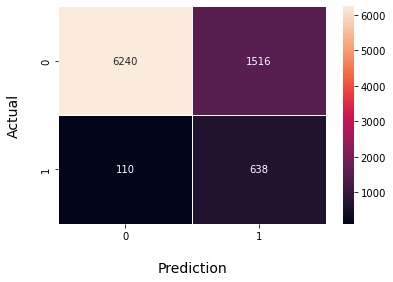

                                               0
CONSTR_MAX_presolve_default             0.058305
LH_CONSTR_MAX_presolve_default          0.044106
BOUNDRANGE_MAX_presolve_default         0.041451
LOWERBOUNDS_STD_presolve_default        0.039236
LOWERBOUNDS_MIN_presolve_default        0.026809
CONSTR_MEAN_presolve_default            0.020674
LP_dualLP_Iter/call                     0.019786
UPPERBOUNDS_MEAN_presolve_default       0.014698
BOUNDRANGE_STD_presolve_default         0.014412
CONSTR_COEFF_MIN_STD_presolve_default   0.011628
ConstraintTimings_integral_1_TotalTime  0.011390
LP_strongbranching_2_Time               0.010888
BOUNDRANGE_MEAN_presolve_default        0.010854
Separators_gomory_FoundCuts             0.010766
LP_dualLP_Iterations                    0.010263
LP_strongbranching_2_Iterations         0.009465
RootLPEstimate                          0.009219
solvingtime                             0.008988
LOWERBOUNDS_MIN_presolve_off            0.008958
TotalTime           

In [29]:
c_array = confusion_matrix(testing_labels, preds)
print(c_array)


ax = plt.axes()
ax = sns.heatmap(c_array, linewidth=0.5, annot=True, fmt='d')
#ax.set_title("Confusion Matrix for Binary Classification of TIMEOUT using SCIP feature extractor, undersampling (2996) and 50/50 train/test split")
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.set_xlabel("Prediction", fontsize=14, labelpad=20)
plt.show()

print(pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False)[:25])
#print("actual labels:", np.array(testing_labels))
#print("predictions:", preds)

## predicting timeout with training undersampling for config X

0: 7342
1: 2658
0: 2658
1: 2658
training accuracy: 1.0
test accuracy: 0.8298828657041678
f1 score: 0.6391216411441779
[[4987 1026]
 [ 223 1106]]


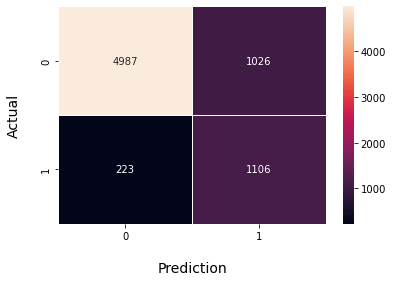

                                               0
LOWERBOUNDS_STD_presolve_default        0.040299
LH_CONSTR_MAX_presolve_default          0.038918
BOUNDRANGE_MAX_presolve_default         0.036824
LOWERBOUNDS_MIN_presolve_default        0.032405
CONSTR_MAX_presolve_default             0.023323
LP_dualLP_Iter/call                     0.019519
Presolvers_milp_ChgBounds               0.016992
CONSTR_MEAN_presolve_default            0.016894
RH_CONSTR_MEAN_presolve_default         0.016586
LP_dualLP_Iterations                    0.016082
CONSTR_COEFF_MIN_STD_presolve_default   0.012325
UPPERBOUNDS_MEAN_presolve_default       0.011840
LOWERBOUNDS_MIN_presolve_off            0.011355
RootLPEstimate                          0.010063
BOUNDRANGE_MEAN_presolve_off            0.009755
LP_strongbranching_2_Iterations         0.009125
ConstraintTimings_integral_1_TotalTime  0.008197
BranchingRules_relpscost_ExecTime       0.008181
BOUNDRANGE_STD_presolve_default         0.008009
BOUNDRANGE_STD_preso

In [30]:
# does configuration default timeout yes or no?
df['TIMEOUT'] = df['SolveTime_default'].apply(set_timeout, t=9600).apply(timeout_dummy)
## Classifier starts here
X = df.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best', 'TIMEOUT'], axis = 1)
y = df['TIMEOUT']

## Try to downsample one of the classes since the dataset is imbalanced
class0, class1 = y.value_counts()
print("0:", class0)
print("1:", class1)

c1 = df[df['TIMEOUT'] == 1]
c0 = df[df['TIMEOUT'] == 0]
df1 = c1.sample(class1)
df0 = c0.sample(class0)

sampled0 = df0.sample(n=len(df1), random_state=1)
undersampled_df = pd.concat([df1, sampled0])
class0, class1 = undersampled_df.TIMEOUT.value_counts()
print("0:", class0)
print("1:", class1)

# do all 4 configurations timeout yes or no?
undersampled_df['TIMEOUT'] = undersampled_df['SolveTime_default'].apply(set_timeout, t=9600).apply(timeout_dummy)
## Classifier starts here
undersampled_X = undersampled_df.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best', 'TIMEOUT'], axis = 1)
undersampled_y = undersampled_df['TIMEOUT']
training, testing, training_labels, testing_labels = train_test_split(undersampled_X, undersampled_y, test_size = .5, random_state = 42, stratify=undersampled_y)


leftover0s = df[df['TIMEOUT'] == 0].drop(sampled0.index)
leftover0sX = leftover0s.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best', 'TIMEOUT'], axis = 1)
leftover0sy = leftover0s['TIMEOUT']


testing = pd.concat([testing,leftover0sX], axis=0)
testing_labels = pd.concat([testing_labels,leftover0sy], axis=0)


clf=RandomForestClassifier()
clf.fit(training, training_labels)
preds = clf.predict(testing)

print("training accuracy:", clf.score(training, training_labels))
print("test accuracy:", clf.score(testing, testing_labels))
print("f1 score:", f1_score(y_true=testing_labels, y_pred=preds))


c_array = confusion_matrix(testing_labels, preds)
print(c_array)


ax = plt.axes()
ax = sns.heatmap(c_array, linewidth=0.5, annot=True, fmt='d')
#ax.set_title("Confusion Matrix for Binary Classification of TIMEOUT using SCIP feature extractor, undersampling (2996) and 50/50 train/test split")
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.set_xlabel("Prediction", fontsize=14, labelpad=20)
plt.show()

print(pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False)[:25])
#print("actual labels:", np.array(testing_labels))
#print("predictions:", preds)

0: 7914
1: 2086
0: 2086
1: 2086
training accuracy: 1.0
test accuracy: 0.8260045489006823
f1 score: 0.5654780687914168
[[5641 1230]
 [ 147  896]]


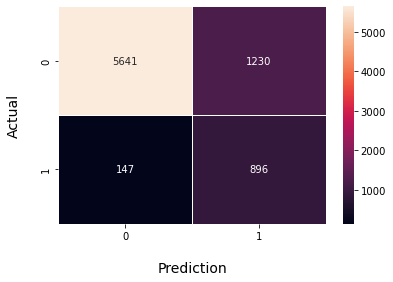

                                               0
LH_CONSTR_MAX_presolve_default          0.041711
LOWERBOUNDS_STD_presolve_default        0.036918
BOUNDRANGE_MAX_presolve_default         0.034248
CONSTR_MAX_presolve_default             0.030619
LOWERBOUNDS_MIN_presolve_default        0.028002
LP_dualLP_Iter/call                     0.022157
LP_dualLP_Iterations                    0.014928
CONSTR_MEAN_presolve_default            0.014038
Presolvers_milp_ChgBounds               0.013345
RootLPEstimate                          0.012387
BOUNDRANGE_STD_presolve_default         0.012108
LP_strongbranching_2_Iterations         0.011877
LP_strongbranching_2_Calls              0.011495
Separators_gomory_FoundCuts             0.010790
BranchingRules_relpscost_ExecTime       0.010321
CONSTR_COEFF_MIN_STD_presolve_default   0.010145
LOWERBOUNDS_MIN_presolve_off            0.009625
LP_strongbranching_2_ItLimit            0.009151
UPPERBOUNDS_MAX_presolve_default        0.008349
BOUNDRANGE_MEAN_pres

In [31]:
# does configuration 1 timeout yes or no?
df['TIMEOUT'] = df['SolveTime_conf1'].apply(set_timeout, t=9600).apply(timeout_dummy)
## Classifier starts here
X = df.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best', 'TIMEOUT'], axis = 1)
y = df['TIMEOUT']

## Try to downsample one of the classes since the dataset is imbalanced
class0, class1 = y.value_counts()
print("0:", class0)
print("1:", class1)

c1 = df[df['TIMEOUT'] == 1]
c0 = df[df['TIMEOUT'] == 0]
df1 = c1.sample(class1)
df0 = c0.sample(class0)

sampled0 = df0.sample(n=len(df1), random_state=1)
undersampled_df = pd.concat([df1, sampled0])
class0, class1 = undersampled_df.TIMEOUT.value_counts()
print("0:", class0)
print("1:", class1)

# do all 4 configurations timeout yes or no?
undersampled_df['TIMEOUT'] = undersampled_df['SolveTime_conf1'].apply(set_timeout, t=9600).apply(timeout_dummy)
## Classifier starts here
undersampled_X = undersampled_df.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best', 'TIMEOUT'], axis = 1)
undersampled_y = undersampled_df['TIMEOUT']
training, testing, training_labels, testing_labels = train_test_split(undersampled_X, undersampled_y, test_size = .5, random_state = 42, stratify=undersampled_y)


leftover0s = df[df['TIMEOUT'] == 0].drop(sampled0.index)
leftover0sX = leftover0s.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best', 'TIMEOUT'], axis = 1)
leftover0sy = leftover0s['TIMEOUT']


testing = pd.concat([testing,leftover0sX], axis=0)
testing_labels = pd.concat([testing_labels,leftover0sy], axis=0)


clf=RandomForestClassifier()
clf.fit(training, training_labels)
preds = clf.predict(testing)

print("training accuracy:", clf.score(training, training_labels))
print("test accuracy:", clf.score(testing, testing_labels))
print("f1 score:", f1_score(y_true=testing_labels, y_pred=preds))


c_array = confusion_matrix(testing_labels, preds)
print(c_array)


ax = plt.axes()
ax = sns.heatmap(c_array, linewidth=0.5, annot=True, fmt='d')
#ax.set_title("Confusion Matrix for Binary Classification of TIMEOUT using SCIP feature extractor, undersampling (2996) and 50/50 train/test split")
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.set_xlabel("Prediction", fontsize=14, labelpad=20)
plt.show()

print(pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False)[:25])
#print("actual labels:", np.array(testing_labels))
#print("predictions:", preds)

0: 8152
1: 1848
0: 1848
1: 1848
training accuracy: 1.0
test accuracy: 0.8400392541707556
f1 score: 0.5525051475634866
[[6043 1185]
 [ 119  805]]


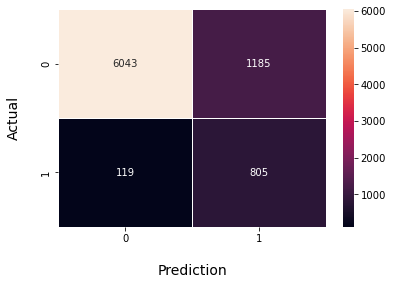

                                                    0
LH_CONSTR_MAX_presolve_default               0.041353
CONSTR_MAX_presolve_default                  0.039128
BOUNDRANGE_MAX_presolve_default              0.036919
LOWERBOUNDS_STD_presolve_default             0.027383
LOWERBOUNDS_MIN_presolve_default             0.020927
LP_dualLP_Iterations                         0.018824
CONSTR_MEAN_presolve_default                 0.018616
LP_strongbranching_2_Iterations              0.018414
LP_dualLP_Iter/call                          0.018128
BranchingRules_relpscost_ExecTime            0.016714
PrimalHeuristics_shiftandpropagate_ExecTime  0.015692
BOUNDRANGE_STD_presolve_default              0.014775
ConstraintTimings_integral_1_EnfoLP          0.013589
LP_strongbranching_2_Calls                   0.013480
LP_strongbranching_2_Time                    0.012970
LP_strongbranching_2_ItLimit                 0.012660
RootLPEstimate                               0.011160
RH_CONSTR_MEAN_presolve_defa

In [32]:
# does configuration 2 timeout yes or no?
df['TIMEOUT'] = df['SolveTime_conf2'].apply(set_timeout, t=9600).apply(timeout_dummy)
## Classifier starts here
X = df.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best', 'TIMEOUT'], axis = 1)
y = df['TIMEOUT']

## Try to downsample one of the classes since the dataset is imbalanced
class0, class1 = y.value_counts()
print("0:", class0)
print("1:", class1)

c1 = df[df['TIMEOUT'] == 1]
c0 = df[df['TIMEOUT'] == 0]
df1 = c1.sample(class1)
df0 = c0.sample(class0)

sampled0 = df0.sample(n=len(df1), random_state=1)
undersampled_df = pd.concat([df1, sampled0])
class0, class1 = undersampled_df.TIMEOUT.value_counts()
print("0:", class0)
print("1:", class1)

# do all 4 configurations timeout yes or no?
undersampled_df['TIMEOUT'] = undersampled_df['SolveTime_conf2'].apply(set_timeout, t=9600).apply(timeout_dummy)
## Classifier starts here
undersampled_X = undersampled_df.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best', 'TIMEOUT'], axis = 1)
undersampled_y = undersampled_df['TIMEOUT']
training, testing, training_labels, testing_labels = train_test_split(undersampled_X, undersampled_y, test_size = .5, random_state = 42, stratify=undersampled_y)


leftover0s = df[df['TIMEOUT'] == 0].drop(sampled0.index)
leftover0sX = leftover0s.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best', 'TIMEOUT'], axis = 1)
leftover0sy = leftover0s['TIMEOUT']


testing = pd.concat([testing,leftover0sX], axis=0)
testing_labels = pd.concat([testing_labels,leftover0sy], axis=0)


clf=RandomForestClassifier()
clf.fit(training, training_labels)
preds = clf.predict(testing)

print("training accuracy:", clf.score(training, training_labels))
print("test accuracy:", clf.score(testing, testing_labels))
print("f1 score:", f1_score(y_true=testing_labels, y_pred=preds))


c_array = confusion_matrix(testing_labels, preds)
print(c_array)


ax = plt.axes()
ax = sns.heatmap(c_array, linewidth=0.5, annot=True, fmt='d')
#ax.set_title("Confusion Matrix for Binary Classification of TIMEOUT using SCIP feature extractor, undersampling (2996) and 50/50 train/test split")
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.set_xlabel("Prediction", fontsize=14, labelpad=20)
plt.show()

print(pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False)[:25])
#print("actual labels:", np.array(testing_labels))
#print("predictions:", preds)

0: 8350
1: 1650
0: 1650
1: 1650
training accuracy: 1.0
test accuracy: 0.8029940119760479
f1 score: 0.4712311153969785
[[5972 1553]
 [  92  733]]


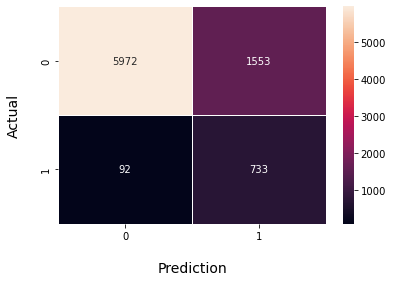

                                               0
LOWERBOUNDS_STD_presolve_default        0.035837
LH_CONSTR_MAX_presolve_default          0.032835
BOUNDRANGE_MAX_presolve_default         0.032653
CONSTR_MAX_presolve_default             0.030649
LOWERBOUNDS_MIN_presolve_default        0.025575
CONSTR_MEAN_presolve_default            0.024310
LP_dualLP_Iter/call                     0.020664
BOUNDRANGE_STD_presolve_default         0.018979
BranchingRules_relpscost_ExecTime       0.014819
CONSTR_COEFF_MIN_STD_presolve_default   0.014709
ConstraintTimings_integral_1_TotalTime  0.012860
ConstraintTimings_integral_1_EnfoLP     0.012843
RH_CONSTR_MEAN_presolve_default         0.011579
LP_strongbranching_2_ItLimit            0.011187
LP_dualLP_Iterations                    0.011138
BOUNDRANGE_MEAN_presolve_default        0.011042
LP_strongbranching_2_Time               0.010586
LP_strongbranching_2_Iterations         0.010318
BOUNDRANGE_STD_presolve_off             0.010219
Presolvers_milp_ChgB

In [33]:
# does configuration 3 timeout yes or no?
df['TIMEOUT'] = df['SolveTime_conf3'].apply(set_timeout, t=9600).apply(timeout_dummy)
## Classifier starts here
X = df.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best', 'TIMEOUT'], axis = 1)
y = df['TIMEOUT']

## Try to downsample one of the classes since the dataset is imbalanced
class0, class1 = y.value_counts()
print("0:", class0)
print("1:", class1)

c1 = df[df['TIMEOUT'] == 1]
c0 = df[df['TIMEOUT'] == 0]
df1 = c1.sample(class1)
df0 = c0.sample(class0)

sampled0 = df0.sample(n=len(df1), random_state=1)
undersampled_df = pd.concat([df1, sampled0])
class0, class1 = undersampled_df.TIMEOUT.value_counts()
print("0:", class0)
print("1:", class1)

# do all 4 configurations timeout yes or no?
undersampled_df['TIMEOUT'] = undersampled_df['SolveTime_conf3'].apply(set_timeout, t=9600).apply(timeout_dummy)
## Classifier starts here
undersampled_X = undersampled_df.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best', 'TIMEOUT'], axis = 1)
undersampled_y = undersampled_df['TIMEOUT']
training, testing, training_labels, testing_labels = train_test_split(undersampled_X, undersampled_y, test_size = .5, random_state = 42, stratify=undersampled_y)


leftover0s = df[df['TIMEOUT'] == 0].drop(sampled0.index)
leftover0sX = leftover0s.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best', 'TIMEOUT'], axis = 1)
leftover0sy = leftover0s['TIMEOUT']


testing = pd.concat([testing,leftover0sX], axis=0)
testing_labels = pd.concat([testing_labels,leftover0sy], axis=0)


clf=RandomForestClassifier()
clf.fit(training, training_labels)
preds = clf.predict(testing)

print("training accuracy:", clf.score(training, training_labels))
print("test accuracy:", clf.score(testing, testing_labels))
print("f1 score:", f1_score(y_true=testing_labels, y_pred=preds))


c_array = confusion_matrix(testing_labels, preds)
print(c_array)


ax = plt.axes()
ax = sns.heatmap(c_array, linewidth=0.5, annot=True, fmt='d')
#ax.set_title("Confusion Matrix for Binary Classification of TIMEOUT using SCIP feature extractor, undersampling (2996) and 50/50 train/test split")
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.set_xlabel("Prediction", fontsize=14, labelpad=20)
plt.show()

print(pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False)[:25])
#print("actual labels:", np.array(testing_labels))
#print("predictions:", preds)